In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_auc_score
import ast

## Both of these random seeds are set to improve the reproducibility of results
from numpy.random import seed
seed(1)

from tensorflow import set_random_seed
set_random_seed(2)

outcomes_train_df = pd.read_csv('../preprocessing/outcomes_data_train.csv')
outcomes_test_df = pd.read_csv('../preprocessing/outcomes_data_test.csv')

# Different attributes could be selected for training to determine which features provided the best classification results
X_train = outcomes_train_df[['DGN', 'PRE6',  'PRE14', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19',
              'PRE25', 'PRE30', 'PRE32', 'PRE4']].values
y_train = outcomes_train_df[['Risk1Yr']].values

X_test = outcomes_test_df[['DGN', 'PRE6',  'PRE14', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19',
              'PRE25', 'PRE30', 'PRE32', 'PRE4']].values
y_test = outcomes_test_df[['Risk1Yr']].values

# This function converted the data from the CSV to a numpy array which is used for training the neural network model
def convert_to_numpy(dataframe):
    new_dataframe = []
    for row in dataframe.tolist():
        for value in range(len(row)):
            if isinstance(row[value], str):
                row[value] = ast.literal_eval(row[value])
        new_row = []
        for element in row:
            if isinstance(element,list):
                for value in element:
                    new_row.append(value)
                continue
            new_row.append(element)
        new_dataframe.append(new_row)
    return np.asarray(new_dataframe)
print(X_train[0])
X_train = convert_to_numpy(X_train)
X_test = convert_to_numpy(X_test)
            
    

['DGN3' 'PRZ1' 'OC12' 'F' 'T' 'F' 'T' 'T' 'F' 'F' 'T' 'T' 'F'
 -0.2269390125379972]


ValueError: malformed node or string: <_ast.Name object at 0x12f44e198>

## Model 1

In [ ]:
# This is our first model which was a deep neural network that used rectified linear activation units
# Dropout was used as regularization of our network and each layer had 64 nodes
model = Sequential()
model.add(Dense(64, input_dim=25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

# This functions compiles the above model with its associated loss function and optimizer
# We used mean squared error as the loss function with the Adam optimizer
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

# This trains the model using 500 epochs and a batch size of 50
model.fit(X_train, y_train,
          epochs=500,
          batch_size=50, verbose=1)

# This was used to return the model's predictions (probabilities) on the test set
# As well as convert the probabilities to the class labels
y_pred_1 = model.predict(X_test)
y_pred_bool = (y_pred_1 >= 0.5)

# This evaluates the trained model on the test set
score, acc = model.evaluate(X_test, y_test, batch_size=100)
print('Test accuracy: ', acc)

In [10]:
cm = confusion_matrix(y_test, y_pred_bool)
print(cm)
print(roc_auc_score(y_test, y_pred_1))

[[67 13]
 [41 29]]
0.6421428571428571


## Model 2





In [11]:
# This is our second model which was a shallow neural network that used hyperbolic tangent activation functions
# Dropout was used as regularization of our network and each layer had 64 nodes
model = Sequential()
model.add(Dense(64, input_dim=25, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='tanh'))

# This functions compiles the above model with its associated loss function and optimizer
# We used mean squared error as the loss function with the stochastic gradient descent optimizer
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

# This trains the model using 500 epochs and a batch size of 50
model.fit(X_train, y_train,
          epochs=500,
          batch_size=50, verbose=1)

# This was used to return the model's predictions (probabilities) on the test set
# As well as convert the probabilities to the class labels
y_pred_2 = model.predict(X_test)
y_pred_bool = (y_pred_2 >= 0.5)

# This evaluates the trained model on the test sets
score, acc = model.evaluate(X_test, y_test, batch_size=100)
print('Test accuracy: ', acc)

Epoch 1/500
600/600 [==============================] - 0s 645us/step - loss: 0.3255 - acc: 0.5400
Epoch 2/500
600/600 [==============================] - 0s 31us/step - loss: 0.2526 - acc: 0.5717
Epoch 3/500
600/600 [==============================] - 0s 33us/step - loss: 0.2271 - acc: 0.6500
Epoch 4/500
600/600 [==============================] - 0s 37us/step - loss: 0.2246 - acc: 0.6333
Epoch 5/500
600/600 [==============================] - 0s 38us/step - loss: 0.2175 - acc: 0.6667
Epoch 6/500
600/600 [==============================] - 0s 41us/step - loss: 0.2182 - acc: 0.6617
Epoch 7/500
600/600 [==============================] - 0s 37us/step - loss: 0.2163 - acc: 0.6567
Epoch 8/500
600/600 [==============================] - 0s 38us/step - loss: 0.2154 - acc: 0.6567
Epoch 9/500
600/600 [==============================] - 0s 37us/step - loss: 0.2109 - acc: 0.6700
Epoch 10/500
600/600 [==============================] - 0s 37us/step - loss: 0.2178 - acc: 0.6767
Epoch 11/500
600/600 [======

600/600 [==============================] - 0s 30us/step - loss: 0.1832 - acc: 0.7367
Epoch 168/500
600/600 [==============================] - 0s 26us/step - loss: 0.1879 - acc: 0.7150
Epoch 169/500
600/600 [==============================] - 0s 30us/step - loss: 0.1805 - acc: 0.7433
Epoch 170/500
600/600 [==============================] - 0s 29us/step - loss: 0.1829 - acc: 0.7317
Epoch 171/500
600/600 [==============================] - 0s 34us/step - loss: 0.1821 - acc: 0.7183
Epoch 172/500
600/600 [==============================] - 0s 32us/step - loss: 0.1851 - acc: 0.7250
Epoch 173/500
600/600 [==============================] - 0s 33us/step - loss: 0.1848 - acc: 0.7417
Epoch 174/500
600/600 [==============================] - 0s 35us/step - loss: 0.1857 - acc: 0.7400
Epoch 175/500
600/600 [==============================] - 0s 34us/step - loss: 0.1907 - acc: 0.7233
Epoch 176/500
600/600 [==============================] - 0s 32us/step - loss: 0.1888 - acc: 0.7267
Epoch 177/500
600/600 [=

600/600 [==============================] - 0s 31us/step - loss: 0.1731 - acc: 0.7700
Epoch 332/500
600/600 [==============================] - 0s 31us/step - loss: 0.1786 - acc: 0.7450
Epoch 333/500
600/600 [==============================] - 0s 32us/step - loss: 0.1713 - acc: 0.7500
Epoch 334/500
600/600 [==============================] - 0s 29us/step - loss: 0.1676 - acc: 0.7700
Epoch 335/500
600/600 [==============================] - 0s 29us/step - loss: 0.1750 - acc: 0.7650
Epoch 336/500
600/600 [==============================] - 0s 31us/step - loss: 0.1697 - acc: 0.7717
Epoch 337/500
600/600 [==============================] - 0s 29us/step - loss: 0.1722 - acc: 0.7550
Epoch 338/500
600/600 [==============================] - 0s 29us/step - loss: 0.1708 - acc: 0.7533
Epoch 339/500
600/600 [==============================] - 0s 29us/step - loss: 0.1699 - acc: 0.7650
Epoch 340/500
600/600 [==============================] - 0s 31us/step - loss: 0.1649 - acc: 0.7667
Epoch 341/500
600/600 [=

600/600 [==============================] - 0s 29us/step - loss: 0.1666 - acc: 0.7733
Epoch 496/500
600/600 [==============================] - 0s 27us/step - loss: 0.1610 - acc: 0.7733
Epoch 497/500
600/600 [==============================] - 0s 26us/step - loss: 0.1588 - acc: 0.7767
Epoch 498/500
600/600 [==============================] - 0s 34us/step - loss: 0.1536 - acc: 0.7967
Epoch 499/500
600/600 [==============================] - 0s 29us/step - loss: 0.1634 - acc: 0.7817
Epoch 500/500
150/150 [==============================] - 0s 777us/step
Test accuracy:  0.653333326180776


In [12]:
cm = confusion_matrix(y_test, y_pred_bool)
print(cm)
print(roc_auc_score(y_test, y_pred_2))

[[71  9]
 [43 27]]
0.7510714285714286


## Model 3

In [13]:
# This is our third model which was a shallow neural network that used sigmoid activation functions
# Dropout was used as regularization of our network and each layer had 64 nodes
model = Sequential()
model.add(Dense(64, input_dim=25, activation='hard_sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='hard_sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='hard_sigmoid'))

# This functions compiles the above model with its associated loss function and optimizer
# We used binary cross entropy error as the loss function with the stochastic gradient descent
# optimizer
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# This trains the model using 500 epochs and a batch size of 50
model.fit(X_train, y_train,
          epochs=500,
          batch_size=50, verbose=1)

# This was used to return the model's predictions (probabilities) on the test set
# As well as convert the probabilities to the class labels
y_pred_3 = model.predict(X_test)
y_pred_bool = (y_pred_3 >= 0.5)

# This evaluates the trained model on the test sets
score, acc = model.evaluate(X_test, y_test, batch_size=100)
print('Test accuracy: ', acc)
cm = confusion_matrix(y_test, y_pred_bool)
print(cm)
print(roc_auc_score(y_test, y_pred_3))

Epoch 1/500
600/600 [==============================] - 1s 907us/step - loss: 0.7136 - acc: 0.4550
Epoch 2/500
600/600 [==============================] - 0s 45us/step - loss: 0.6954 - acc: 0.5150
Epoch 3/500
600/600 [==============================] - 0s 43us/step - loss: 0.6870 - acc: 0.5483
Epoch 4/500
600/600 [==============================] - 0s 43us/step - loss: 0.6940 - acc: 0.5100
Epoch 5/500
600/600 [==============================] - 0s 47us/step - loss: 0.6866 - acc: 0.5250
Epoch 6/500
600/600 [==============================] - 0s 47us/step - loss: 0.6876 - acc: 0.5483
Epoch 7/500
600/600 [==============================] - 0s 51us/step - loss: 0.6791 - acc: 0.5583
Epoch 8/500
600/600 [==============================] - 0s 47us/step - loss: 0.6789 - acc: 0.5750
Epoch 9/500
600/600 [==============================] - 0s 50us/step - loss: 0.6859 - acc: 0.5417
Epoch 10/500
600/600 [==============================] - 0s 47us/step - loss: 0.6831 - acc: 0.5717
Epoch 11/500
600/600 [======

600/600 [==============================] - 0s 40us/step - loss: 0.5963 - acc: 0.6833
Epoch 168/500
600/600 [==============================] - 0s 39us/step - loss: 0.5879 - acc: 0.6717
Epoch 169/500
600/600 [==============================] - 0s 38us/step - loss: 0.6010 - acc: 0.6800
Epoch 170/500
600/600 [==============================] - 0s 40us/step - loss: 0.5944 - acc: 0.6817
Epoch 171/500
600/600 [==============================] - 0s 39us/step - loss: 0.5929 - acc: 0.6900
Epoch 172/500
600/600 [==============================] - 0s 40us/step - loss: 0.5914 - acc: 0.6983
Epoch 173/500
600/600 [==============================] - 0s 39us/step - loss: 0.5929 - acc: 0.6817
Epoch 174/500
600/600 [==============================] - 0s 41us/step - loss: 0.5947 - acc: 0.6717
Epoch 175/500
600/600 [==============================] - 0s 38us/step - loss: 0.5969 - acc: 0.6817
Epoch 176/500
600/600 [==============================] - 0s 37us/step - loss: 0.5909 - acc: 0.6833
Epoch 177/500
600/600 [=

600/600 [==============================] - 0s 38us/step - loss: 0.5789 - acc: 0.6900
Epoch 332/500
600/600 [==============================] - 0s 41us/step - loss: 0.5827 - acc: 0.6867
Epoch 333/500
600/600 [==============================] - 0s 41us/step - loss: 0.5764 - acc: 0.6933
Epoch 334/500
600/600 [==============================] - 0s 37us/step - loss: 0.5805 - acc: 0.6867
Epoch 335/500
600/600 [==============================] - 0s 39us/step - loss: 0.5772 - acc: 0.6933
Epoch 336/500
600/600 [==============================] - 0s 41us/step - loss: 0.5807 - acc: 0.6833
Epoch 337/500
600/600 [==============================] - 0s 39us/step - loss: 0.5813 - acc: 0.6867
Epoch 338/500
600/600 [==============================] - 0s 38us/step - loss: 0.5877 - acc: 0.6850
Epoch 339/500
600/600 [==============================] - 0s 37us/step - loss: 0.5796 - acc: 0.6933
Epoch 340/500
600/600 [==============================] - 0s 41us/step - loss: 0.5826 - acc: 0.7033
Epoch 341/500
600/600 [=

600/600 [==============================] - 0s 39us/step - loss: 0.5648 - acc: 0.7200
Epoch 496/500
600/600 [==============================] - 0s 40us/step - loss: 0.5749 - acc: 0.6783
Epoch 497/500
600/600 [==============================] - 0s 43us/step - loss: 0.5723 - acc: 0.6683
Epoch 498/500
600/600 [==============================] - 0s 39us/step - loss: 0.5661 - acc: 0.6867
Epoch 499/500
600/600 [==============================] - 0s 40us/step - loss: 0.5715 - acc: 0.6733
Epoch 500/500
150/150 [==============================] - 0s 887us/step
Test accuracy:  0.6400000254313151
[[70 10]
 [44 26]]
0.7796428571428573


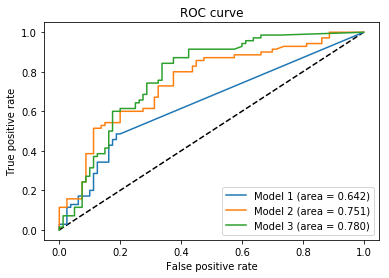

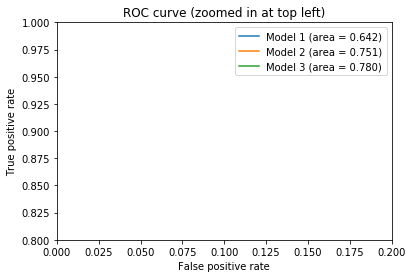

In [14]:
# This section of code determines the false positive rates and true positive rates
# for each model in addition to the AUC so that the ROC Curves can be plotted
from sklearn.metrics import roc_curve
fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test, y_pred_1.ravel())
from sklearn.metrics import auc
auc_keras_1 = auc(fpr_keras_1, tpr_keras_1)

fpr_keras_2, tpr_keras_2, thresholds_keras_2 = roc_curve(y_test, y_pred_2.ravel())
auc_keras_2 = auc(fpr_keras_2, tpr_keras_2)


fpr_keras_3, tpr_keras_3, thresholds_keras_3 = roc_curve(y_test, y_pred_3.ravel())
auc_keras_3 = auc(fpr_keras_3, tpr_keras_3)
import matplotlib.pyplot as plt
%matplotlib inline

# This code plots all of the ROC curves onto one plot so that they can be compared effectively
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_1, tpr_keras_1, label='Model 1 (area = {:.3f})'.format(auc_keras_1))
plt.plot(fpr_keras_2, tpr_keras_2, label='Model 2 (area = {:.3f})'.format(auc_keras_2))
plt.plot(fpr_keras_3, tpr_keras_3, label='Model 3 (area = {:.3f})'.format(auc_keras_3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()